In [1]:
#Import modules
import pyodbc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#Connect to DB
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=jvsql02;'
                      'Database=ML;'
                      'Trusted_Connection=yes;')

#Select the data from the table
SQL_Query = pd.read_sql_query(
'''select * from ML.dbo.TCR_ML_WELLS_Time_Analysis_Full''', conn)

In [3]:
#Convert the query to a data frame
df = pd.DataFrame(SQL_Query, columns=              
    [
        'WellName','ReportDateTime','AccumulatedConnectionTime','AccumulatedFillupStrokes','AccumulatedFillupVolume'
,'ADAutoDrillerRunning','ADAuxiliary1','ADAuxiliary2','ADAuxiliary3','ADAuxiliary4','ADAuxiliary5'
,'ADDifferentialPressureActualValue','ADDifferentialPressureLimitValue','ADDifferentialPressureSetpointValue','ADDPEnabled'
,'ADHookloadSlider','ADROPActualValue','ADROPCruiseControlEnabled','ADROPSetpointValue','ADSPPSlider','ADSystemEnabled'
,'ADWOBActualValue','ADWOBEnabled','ADWOBLimitValue','ADWOBSetpointValue','BitArea','BitNozzleTotalFlowArea','BitRPM'
,'BitTime_OffBottom','BitTime_OnBottom','BlockPosition','CasingPressure','CoilEngaged','ConnectionCounter'
,'CurrentConnectionTime','Date','DateDateOnly','DateTimeOnly','Depth_Bit','DepthHoleTVD','DifferentialPressure'
,'DrillCabTDSUTemp','DrillMode','DynamicVariable06','DynamicVariable09','DynamicVariable10','EC1Active','EC1ActivityCode1'
,'EC1ActivityCode2','EC1ActivityCode3','EC1ActivityCode4','EC1ActivityCode5','EC1Authorized','EC1DPModeOn','EC1DPModeOnReq'
,'EC1DPSPActual','EC1DPSPRecommended','EC1Ready','EC1ROPSPActual','EC1ROPSPRecommended','EC1WOBModeOn','EC1WOBModeOnReq'
,'EC1WOBSPActual','EC1WOBSPRecommended','FlowIn','GasTotal_units','H2S04','H2S08','H2S09','H2S11','Hookload'
,'HookloadInline','HookloadString','JobPumpVolumeTotal','JobStrokesTotal','LagDepthGas','LEL01','LEL02','LEL03','LEL04'
,'LEL05','LEL06','LEL07','LEL08','LEL09','LEL10','LEL11','LEL12','MudMotorRPM','MWDAzimuth'
,'MWDContinuousInclination','MWDGammaAPI','MWDInclination','MWDSrvToolfaceAdvisory','MWDSrvToolfaceLimits'
,'OnBottom','OverPull','Pit01Volume','Pit02Volume','Pit03Volume','Pit04Volume','Pit05GL','Pit06Volume','Pit07Volume'
,'PitGLActive','PitGLCompanyMan','PitGLMudLogger','PitGLMWD','PitGLSignature','PitVolumeActive','PitVolumeTotal'
,'PLCStatus','PreviousConnectionTime','PumpOffTime','PumpOnTime','PumpPressure','PumpsOn','PumpVolumeTotal','ReturnFlow'
,'ReturnFlowDetected','REVitEnabled','REVitUsageAlert','ROCKIT_BearingActualRW','ROCKIT_HITRQLeft','ROCKIT_HITRQLeftPercent'
,'ROCKIT_HITRQRight','ROCKIT_HITRQRightPercent','ROCKIT_OnOff','ROCKIT_OscillationLeftRW','ROCKIT_OscillationRightRW'
,'ROCKIT_PILOTOnOff','ROCKIT_ResultantToolface','ROCKIT_RPMRW','ROCKIT_ScoreCardRW','ROCKIT_SlidetoMDRW','ROCKIT_TFtoRW'
,'ROP5xDepthhour','ROPDepth_StepDepthHour','ROPDepthHour','ROPMax','ROPMinuteDepth','ROPTimeDepthHour','RotaryRPM'
,'RunningSpeedDown','RunningSpeedUp','SeperatorFlow','SlipsSet','SPM1','SPM2','SPMTotal','StaticInjectorForce'
,'STCfActualNm_Sec','STKfActualNm','Strokes1','Strokes1CompanyMan','Strokes2','Strokes2CompanyMan','StrokesTotal'
,'StrokesTotalCompanyMan','StrokesTotalMudLogger','TDOilSensorBypassAlarm','TDOilType','TDPLCAlarm1','TDPLCAlarm4'
,'TDQuillPosition','TDS_AmbientTemperature','TDS_BrakeTemperature','TDS_HPUOilTankTemperature','TDS_HydraulicTemperature'
,'TDS_LowerBearingTemp','TDS_LubeOilAfterFilterPres','TDS_LubeOilPressure','TDS_LubeOilTemperature'
,'TDS_MotorWindingTemperature1','TDS_MotorWindingTemperature2','TDS_MotorWindingTemperature3ACOnly'
,'TDS_OilPressureAcrosstheFilter','TDS_UpperBearingTemp','TDSRotaryTorqueLimit','TDTorqueInline','TongMakeupStartPressure'
,'TonMilesEventCumulative','TonMilesMegajoules','TopDriveRPM','TopDriveRPMCommand','TopDriveTorqueCommand'
,'TopDriveTorqueft_lbs','TorqueDelta','TorqueTare','TripGL','TripGLCompanyMan','TripGLSignature','TripModeAccumulation'
,'TripModeFillupStrokes','TripVolumeActive','UnderPull','VFDVariable10','VFDVariable9','WeightonBit'
            ])

In [4]:
df.drop([ 'AccumulatedFillupStrokes', 'AccumulatedFillupVolume', 'ADAuxiliary2', 'ADAuxiliary3', 'ADAuxiliary4', 'ADAuxiliary5', 'BitArea', 'BitNozzleTotalFlowArea', 'CoilEngaged', 'CurrentConnectionTime'
, 'DrillMode', 'DynamicVariable09', 'EC1Active', 'EC1ActivityCode1', 'EC1ActivityCode2', 'EC1ActivityCode3', 'EC1ActivityCode4', 'EC1ActivityCode5', 'EC1Authorized', 'EC1DPModeOn', 'EC1DPModeOnReq'
, 'EC1DPSPActual', 'EC1DPSPRecommended', 'EC1Ready', 'EC1ROPSPActual', 'EC1ROPSPRecommended', 'EC1WOBModeOn', 'EC1WOBModeOnReq', 'EC1WOBSPActual', 'EC1WOBSPRecommended', 'H2S08', 'H2S09'
, 'HookloadInline', 'LEL01', 'LEL03', 'LEL05', 'LEL06', 'LEL08', 'LEL09', 'LEL10', 'LEL12', 'MudMotorRPM', 'OnBottom', 'PLCStatus', 'REVitEnabled', 'REVitUsageAlert', 'ROCKIT_PILOTOnOff', 'SlipsSet'
, 'StaticInjectorForce', 'STCfActualNm_Sec', 'STKfActualNm', 'TDOilSensorBypassAlarm', 'TDOilType', 'TDTorqueInline', 'TongMakeupStartPressure', 'TorqueTare', 'UnderPull', 'VFDVariable10', 'VFDVariable9'
, 'H2S04', 'LEL02', 'LEL11', 'SeperatorFlow', 'H2S11', 'Date', 'DateDateOnly', 'DateTimeOnly', 'AccumulatedConnectionTime', 'ADAutoDrillerRunning', 'ADDPEnabled', 'ADROPCruiseControlEnabled', 'ADSystemEnabled', 'ADWOBEnabled'
, 'ReportDateTime', 'TripModeAccumulation', 'TripModeFillupStrokes'
        ], axis=1, inplace=True)

#, 'WellName'

In [5]:
df.drop(['WellName'], axis=1, inplace=True)

In [6]:
#see the dimensions of the data
df.shape

(725789, 122)

In [7]:
#Show first 5 rows of data
df.head(2)

,ADAuxiliary1,ADDifferentialPressureActualValue,ADDifferentialPressureLimitValue,ADDifferentialPressureSetpointValue,ADHookloadSlider,ADROPActualValue,ADROPSetpointValue,ADSPPSlider,ADWOBActualValue,ADWOBLimitValue,...,TopDriveRPM,TopDriveRPMCommand,TopDriveTorqueCommand,TopDriveTorqueft_lbs,TorqueDelta,TripGL,TripGLCompanyMan,TripGLSignature,TripVolumeActive,WeightonBit
0,65.026100,260.875885,850.0,420.0,1.0,13.85443,90.0,1.0,21.675610,32.0,...,65.068710,65.068710,7801.826660,7801.826660,8106.402832,2.75318,-36.650749,3.614740e+09,3.62847,22.928080
1,64.834343,238.689758,850.0,420.0,1.0,67.49762,90.0,1.0,22.071711,32.0,...,64.994141,64.994141,8277.098633,8277.098633,10024.226562,2.73727,-36.666672,3.614740e+09,3.61256,22.223921


# Grid Search ----DO NOT RUN

In [44]:
params = {'max_depth':[5, 10, 15], 'min_samples_split':[4, 2, 8]}

clf = DecisionTreeClassifier()

grid = GridSearchCV(clf, params, cv=10)

In [45]:
#To run on small sample set
grid.fit(X[:100], y[:100])

#to run on full data set
#grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'min_samples_split': [4, 2, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
best_dt = grid.best_estimator_

In [47]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

# Pick up below

# Create Labels

In [8]:
label_column =  'ROCKIT_OnOff'

#dt = DecisionTreeClassifier()
#After grid search is done you can use the object for descion tree fits
dt = grid.best_estimator_

features = df.dropna().drop([label_column], axis=1)
#features = df.dropna().drop([label_column, 'ROCKIT_RPMRW'], axis=1)
labels = df.dropna()[label_column]

X = features.values
y = labels.values

In [9]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Create indices
### Non zero importances

In [10]:
#index feature importance
feature_importances = dt.feature_importances_

#Get non zero indicies to filter with
nz_indices = np.argwhere(feature_importances > 0)
nz_features = features.columns[nz_indices].values.flatten()
nz_importances = feature_importances[nz_indices].flatten()

In [11]:
#Find the most importance features number
#nz_features[ np.argmax(nz_importances) ]
#nz_importances.max()

print("Max non-zero feature name = "+ nz_features[ np.argmax(nz_importances) ])
print("Max non-zero feature value = %s" % nz_importances.max())

Max non-zero feature name = ROCKIT_RPMRW
Max non-zero feature value = 0.822631303621835


### Top quartiles analysis

In [12]:
imp = pd.Series(nz_importances)
desc = imp.describe()
desc

count    1.160000e+02
mean     8.620690e-03
std      7.644493e-02
min      4.987565e-08
25%      4.058326e-05
50%      1.128657e-04
75%      5.142677e-04
max      8.226313e-01
dtype: float64

In [13]:
#Function to run percent analysis
def rank(imp, perc, remove_outlier=True):
    if remove_outlier:
        imp = imp[imp < imp.max()]
   
    desc = imp.describe()
    if type(perc) == str:
        top = imp[ imp >=  desc[perc]]
    else:
        top = imp[ imp >= perc]
    
    # N top features
    n_top = top.shape[0]
    
    # Total variation explanation
    var_expl = top.sum() / imp.sum()
    
    return n_top, var_expl

### Save the features and variance to object

In [14]:
#Create variables that shows features and variances
#Number of features, fractioned explained by variance

# True (default) = removes outlier
# False = Keeps outlier

Perc25_NoOutlier = rank(imp, '25%')
Perc50_NoOutlier = rank(imp, '50%')
Perc75_NoOutlier = rank(imp, '75%')


Perc25_WithOutlier = rank(imp, '25%', False)
Perc50_WithOutlier = rank(imp, '50%', False)
Perc75_WithOutlier = rank(imp, '75%', False)

### Features & Variance with no Outliers

In [58]:
print(f'25% Quartile with no outlier include {Perc25_NoOutlier[0]} features and explains {Perc25_NoOutlier[1]} of the variance')
print(f'50% Quartile with no outlier include {Perc50_NoOutlier[0]} features and explains {Perc50_NoOutlier[1]} of the variance')
print(f'75% Quartile with no outlier include {Perc75_NoOutlier[0]} features and explains {Perc75_NoOutlier[1]} of the variance')

25% Quartile with no outlier include 86 features and explains 0.996478015115105 of the variance
50% Quartile with no outlier include 58 features and explains 0.9852826277301637 of the variance
75% Quartile with no outlier include 29 features and explains 0.9502223460638385 of the variance


### Features & Variance with Outliers

In [59]:
print(f'25% Quartile with outlier include {Perc25_WithOutlier[0]} features and explains {Perc25_WithOutlier[1]} of the variance')
print(f'50% Quartile with outlier include {Perc50_WithOutlier[0]} features and explains {Perc50_WithOutlier[1]} of the variance')
print(f'75% Quartile with outlier include {Perc75_WithOutlier[0]} features and explains {Perc75_WithOutlier[1]} of the variance')

25% Quartile with outlier include 87 features and explains 0.9993753101323021 of the variance
50% Quartile with outlier include 58 features and explains 0.9972786443860884 of the variance
75% Quartile with outlier include 29 features and explains 0.9906846019967052 of the variance


# Top 25% Features

<BarContainer object of 29 artists>

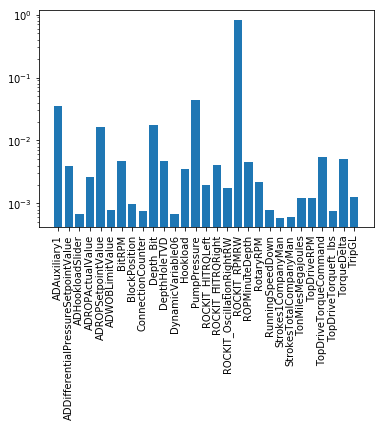

In [15]:
#Apply threshold to only use top 25% of features
threshold = desc['75%']

top_indices = np.argwhere(nz_importances > threshold)
top_features = nz_features[top_indices].flatten()
top_importances = nz_importances[top_indices].flatten()

#Plot the data
plt.xticks(rotation=90)
plt.bar(top_features, top_importances, log=True)

## Sort the data by size

<BarContainer object of 29 artists>

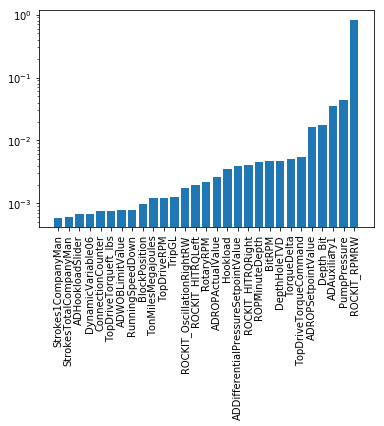

In [16]:
sorted_indices = np.argsort(top_importances)
sorted_features = top_features[sorted_indices]
sorted_importances = top_importances[sorted_indices]

#Plot the sorted values
plt.xticks(rotation=90)
plt.bar(sorted_features, sorted_importances, log=True)